In [1]:
import time
import os
import pandas as pd
import numpy as np
import scipy.stats as stats
from csep.utils.plotting import plot_mfd
import csep
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Comcat Synthetics
epoch_time = 709732655000
duration_in_years = 1.0
t0 = time.time()
comcat = csep.load_catalog(type='comcat', format='native',
                        start_epoch=epoch_time, duration_in_years=1.0,
                        min_magnitude=2.5, 
                        min_latitude=31.50, max_latitude=43.00,
                        min_longitude=-125.40, max_longitude=-113.10,
                    name='Comcat')
t1 = time.time()

# Statements about Comcat Downloads
print("Fetched Comcat catalog in {} seconds.\n".format(t1-t0))
print("Downloaded Comcat Catalog with following parameters")
print("Start Date: {}\nEnd Date: {}".format(str(comcat.start_time), str(comcat.end_time)))
print("Min Latitude: {} and Max Latitude: {}".format(comcat.min_latitude, comcat.max_latitude))
print("Min Longitude: {} and Max Longitude: {}".format(comcat.min_longitude, comcat.max_longitude))
print("Min Magnitude: {} and Max Magnitude: {}\n".format(comcat.min_magnitude, comcat.max_magnitude))


Fetched Comcat catalog in 24.94754195213318 seconds.

Downloaded Comcat Catalog with following parameters
Start Date: 1992-06-28 12:00:59.904000+00:00
End Date: 1993-06-28 02:33:55.456000+00:00
Min Latitude: 31.597166061401367 and Max Latitude: 41.83566665649414
Min Longitude: -125.38899993896484 and Max Longitude: -113.107666015625
Min Magnitude: 2.5 and Max Magnitude: 6.300000190734863



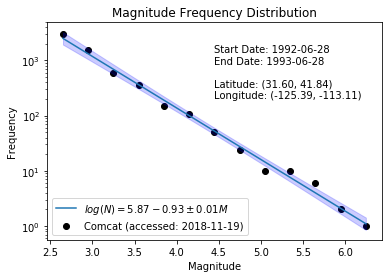

In [3]:
# test implementation
mfd = comcat.get_mfd()
plot_mfd(comcat, show=True)

In [100]:
from IPython.display import clear_output

# read in ucerf3 simulations
project_root = '/Users/wsavran/Projects/CSEP2/u3etas_simulations/landers_experiment'
filename = os.path.join(project_root, '10-23-2018_landers-pt1/results_complete.bin')
filename_nofaults = os.path.join(project_root, '10-31-2018_landers-nofaults-pt1/results_complete.bin')

u3catalogs = csep.load_stochastic_event_set(filename=filename, format='native', type='ucerf3', name='UCERF3-ETAS')

b_values = []
remaining = 10000
tot_time = 0
print('Processing stochastic event set...')
for catalog in u3catalogs:
    t0 = time.time()
    cat_id = catalog.catalog_id
    mfd = catalog.get_mfd()
    b_values.append(mfd.loc[0,'b'])
    t1 = time.time()
    tot_time = tot_time + (t1-t0)
    avg_time = tot_time/(cat_id+1)
    if cat_id % 250 == 0 and cat_id != 0:
        print('Estimated time remaining: {:.2f} seconds.'.format(remaining*avg_time))
    remaining = remaining - 1
    
print('Completed computed {} magnitude frequency distributions in {:.2f} seconds\nwith an average compute time of {:.2f} seconds.'
      .format(cat_id + 1, tot_time, avg_time))



Processing stochastic event set...
Estimated time remaining: 597.37 seconds.
Estimated time remaining: 584.79 seconds.
Estimated time remaining: 571.95 seconds.
Estimated time remaining: 565.46 seconds.
Estimated time remaining: 552.21 seconds.
Estimated time remaining: 537.90 seconds.
Estimated time remaining: 523.94 seconds.
Estimated time remaining: 504.65 seconds.
Estimated time remaining: 486.92 seconds.
Estimated time remaining: 471.37 seconds.
Estimated time remaining: 457.15 seconds.
Estimated time remaining: 440.17 seconds.
Estimated time remaining: 424.17 seconds.
Estimated time remaining: 409.17 seconds.
Estimated time remaining: 392.97 seconds.
Estimated time remaining: 376.83 seconds.
Estimated time remaining: 360.59 seconds.
Estimated time remaining: 346.60 seconds.
Estimated time remaining: 331.58 seconds.
Estimated time remaining: 315.98 seconds.
Estimated time remaining: 300.47 seconds.
Estimated time remaining: 285.05 seconds.
Estimated time remaining: 269.50 seconds.

In [99]:
u3catalogs = csep.load_stochastic_event_set(filename=filename, format='native', type='ucerf3', name='UCERF3-ETAS')
t0 = time.time()
b_values_test = list(map(lambda x: x.get_mfd().loc[0,'b'],u3catalogs))
t1 = time.time()
print('Processed {} catalogs in {:.2f} seconds.'.format(len(b_values_test), t1-t0))

Processed 10000 catalogs in 655.93 seconds.


Completed processing 10000 magnitude frequency distributions in 616.09 seconds
with an average compute time of 0.06 seconds per catalog.


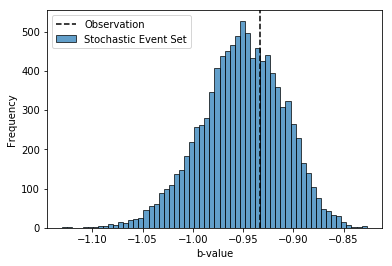

In [30]:
print('Completed processing {} magnitude frequency distributions in {:.2f} seconds\nwith an average compute time of {:.2f} seconds per catalog.'
      .format(cat_id + 1, tot_time, avg_time))
b_values = array(b_values)
b_value_comcat = comcat.mfd.loc[0, 'b']
fig = hist(b_values, bins = 60, edgecolor='black', alpha=0.7, label='Stochastic Event Set')
axvline(x=b_value_comcat, color='black', linestyle='--', label='Observation')
xlabel('b-value')
ylabel('Frequency')
legend(loc='upper left')

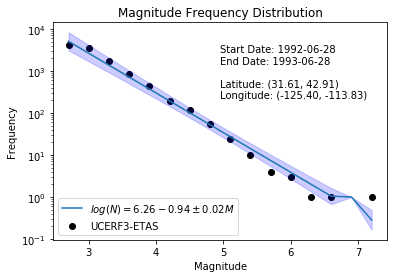

In [65]:
u3catalogs = csep.load_stochastic_event_set(filename=filename, format='native', type='ucerf3', name='UCERF3-ETAS')
catalog = next(u3catalogs)
catalog.get_mfd()
plot_mfd(catalog)

Text(0, 0.5, 'Frequency')

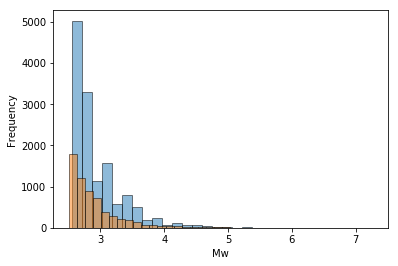

In [78]:
# plot histograms of comcat and single ucerf3 catalog
fig, ax = subplots()
mags = catalog.get_magnitudes()
comcat_mags = comcat.get_magnitudes()
h = hist(mags, bins=30, edgecolor='black', alpha=0.5)
hc = hist(comcat_mags, bins=30, edgecolor='black', alpha=0.5)
xlabel('Mw')
ylabel('Frequency')

Computed ECDF for two catalogs in 0.001814126968383789 seconds.


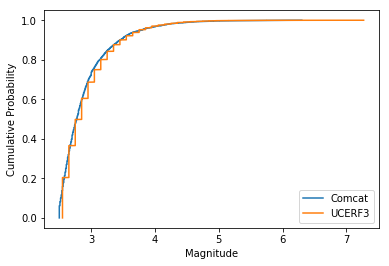

In [92]:
def ecdf(x):
    xs = np.sort(x)
    ys = np.arange(1, len(xs)+1)/float(len(xs))
    return xs, ys   
    
t0 = time.time()
ecdf_comcat = ecdf(comcat_mags)
ecdf_ucerf3 = ecdf(mags)
t1 = time.time()
print('Computed ECDF for two catalogs in {} seconds.'.format(t1-t0))

fig, ax = subplots()
plot(*ecdf(comcat_mags), label='Comcat')
plot(*ecdf(mags), label='UCERF3')
pyplot.xlabel('Magnitude')
pyplot.ylabel('Cumulative Probability')
legend(loc='lower right')

Processed 1000 catalogs.
Processed 2000 catalogs.
Processed 3000 catalogs.
Processed 4000 catalogs.
Processed 5000 catalogs.
Processed 6000 catalogs.
Processed 7000 catalogs.
Processed 8000 catalogs.
Processed 9000 catalogs.


Text(0, 0.5, 'Cumulative Probability')

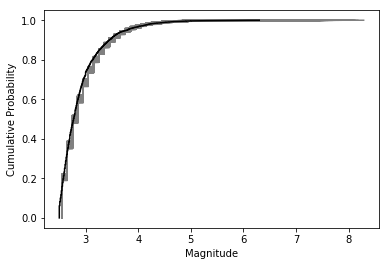

In [95]:
u3catalogs = csep.load_stochastic_event_set(filename=filename, format='native', type='ucerf3', name='UCERF3-ETAS')
fig, ax = subplots()
for catalog in u3catalogs:
    if catalog.catalog_id % 1000 == 0 and catalog.catalog_id != 0:
        print('Processed {} catalogs.'.format(catalog.catalog_id))
    mags = catalog.get_magnitudes()
    x, y = ecdf(mags)
    ax.plot(x, y, color='gray')

comcat_mags = comcat.get_magnitudes()
xc, yc = ecdf(comcat_mags)
ax.plot(xc, yc, color='black')
pyplot.xlabel('Magnitude')
pyplot.ylabel('Cumulative Probability')